In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat
from sklearn.svm import SVC

In [66]:
def plot_data(X, y):
    pos = y.ravel() == 1
    neg = y.ravel() == 0
    plt.scatter(X[pos,0], X[pos,1], marker="+", color="k",  s=60, linewidths=1)
    plt.scatter(X[neg,0], X[neg,1], marker="o", color="y",  s=60, linewidths=1)

In [67]:
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    # create a grid for plotting
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # predict the value at each "pixel"
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plot_data(X, y)
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='|', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

In [68]:
data1 = loadmat('machine-learning-ex6/ex6/ex6data1.mat')
data1.keys()
y.shape

(51, 1)

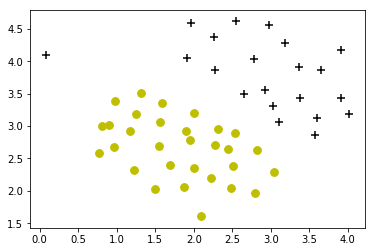

In [69]:
X1 = data1["X"]
y1 = data1["y"]
plot_data(X1,y1)

In [70]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X1, y1.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

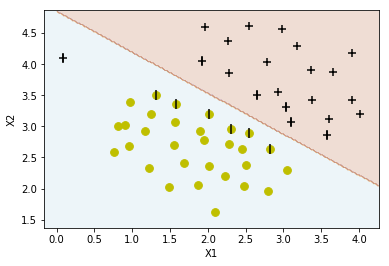

('Number of support vectors: ', 12)


In [71]:
plot_svc(clf, X1, y1)

In [72]:
clf1 = SVC(C=100.0, kernel='linear')
clf1.fit(X1, y1.ravel())

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

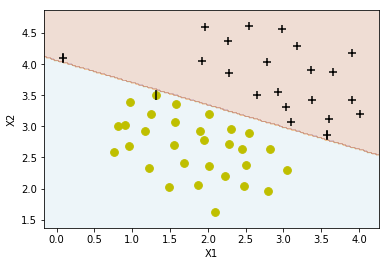

('Number of support vectors: ', 3)


In [73]:
plot_svc(clf1, X1, y1)

### SVM with Gaussian Kernels

In [81]:
def gaussian_kernel(x1, x2, sigma=2):
    norm = (x1-x2).dot(x1-x2)
    print norm
    return np.exp(-1.0*norm/(2*sigma**2))
# x1 =np.array([1,2,1])
# x2 = np.array([0,4,-1])
# sigma = 2
# gaussian_kernel(x1, x2, sigma)

x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

gaussian_kernel(x1, x2, sigma)

9


0.32465246735834974

In [82]:
data2 = loadmat('machine-learning-ex6/ex6/ex6data2.mat')
data2.keys()

['y', 'X', '__version__', '__header__', '__globals__']

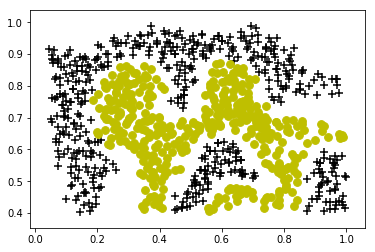

In [83]:
y2 = data2['y']
X2 = data2['X']

plot_data(X2, y2)

In [84]:
clf2 = SVC(C=50, kernel='rbf', gamma=6)
clf2.fit(X2,y2)

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=6, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

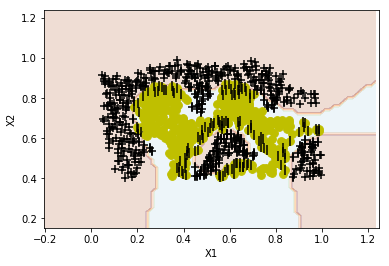

('Number of support vectors: ', 254)


In [85]:
plot_svc(clf2, X2, y2)

In [47]:
data3 = loadmat('machine-learning-ex6/ex6/ex6data3.mat')
data3.keys()

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']

In [87]:
X3 = data3['X']
y3 = data3['y']
Xval = data3['Xval']
yval = data3['yval']

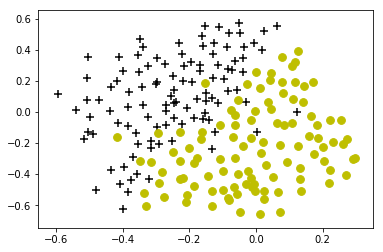

In [88]:
plot_data(X3, y3)

In [89]:
C_values = sigma_values = [0.01, 0.03, 0.1,0.3,1.0, 3.0,10.0, 30.0] 

In [95]:
best_pair = (0,0)
best_score = 0
for i in C_values:
    for j in sigma_values:
        gamma = np.power(j, -2.0)
        sv = SVC(C=i, gamma=gamma, kernel='rbf')
        sv.fit(X3, y3.ravel())
        s = sv.score(Xval, yval)
        if s > best_score:
            best_pair = (i,j)
            best_score = s
print "best C, sigma combinations is (%f, %f) with score %f"%(best_pair[0], best_pair[1], best_score)

best C, sigma combinations is (0.300000, 0.100000) with score 0.965000


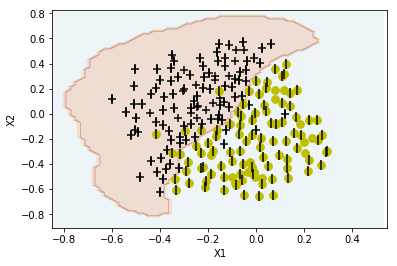

('Number of support vectors: ', 178)


In [99]:
svc = SVC(C=0.3, gamma=np.power(0.1, -2.0), kernel='rbf')
svc.fit(X3,y3.ravel())
plot_svc(svc, X3, y3)